# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [4]:
Data1 = pd.read_csv(r"C:\Users\shrik\OneDrive\Desktop\SS\Project\ML\calories\calories.csv")

In [5]:
Data1

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [6]:
Data2 = pd.read_csv(r"C:\Users\shrik\OneDrive\Desktop\SS\Project\ML\calories\exercise.csv")

In [7]:
Data2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


# Combining Datasets

In [8]:
df = pd.concat([Data2,Data1['Calories']], axis=1)

In [9]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [13]:
df.shape

(15000, 9)

# Visualization

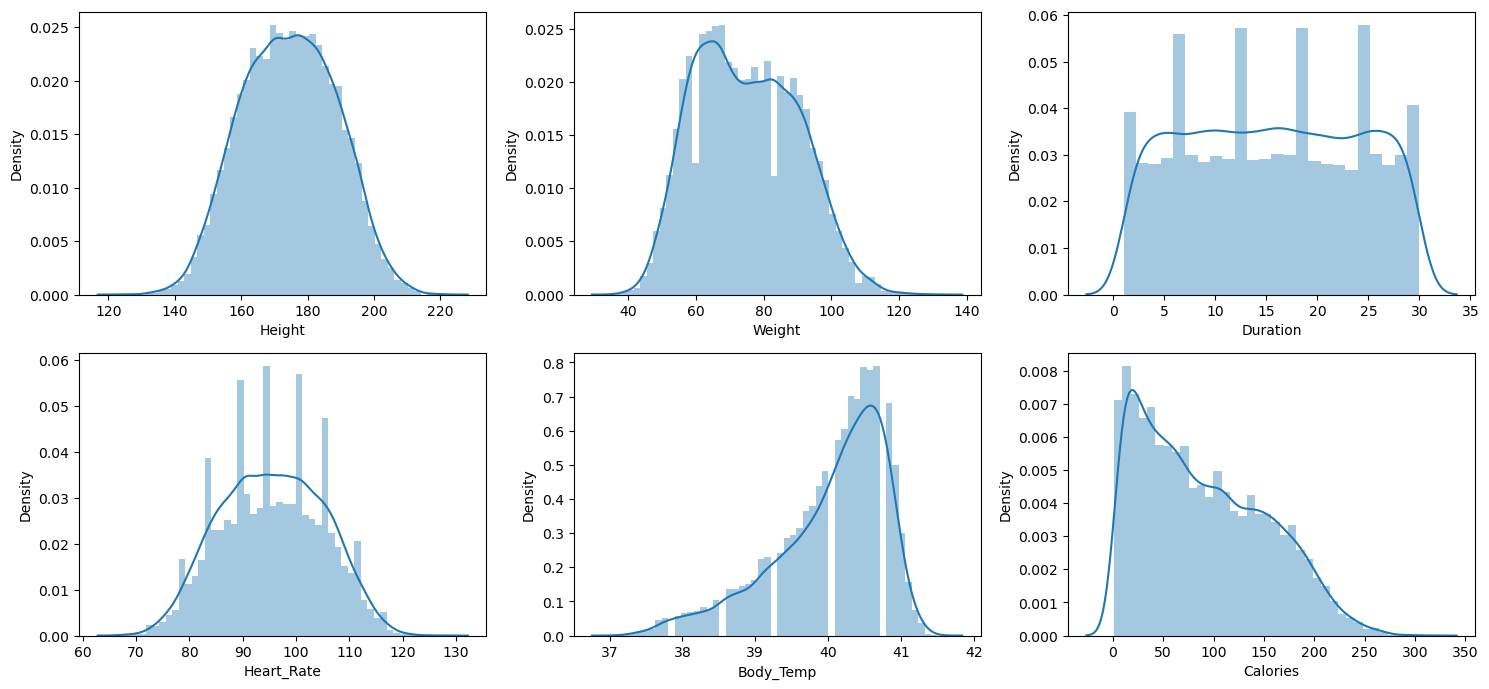

In [14]:
columns = df.select_dtypes(include='float').columns 
  
plt.subplots(figsize=(15, 7)) 
for i, col in enumerate(columns): 
    plt.subplot(2, 3, i + 1) 
    sns.distplot(df[col]) 
plt.tight_layout() 
plt.show() 

# Finding Outlier

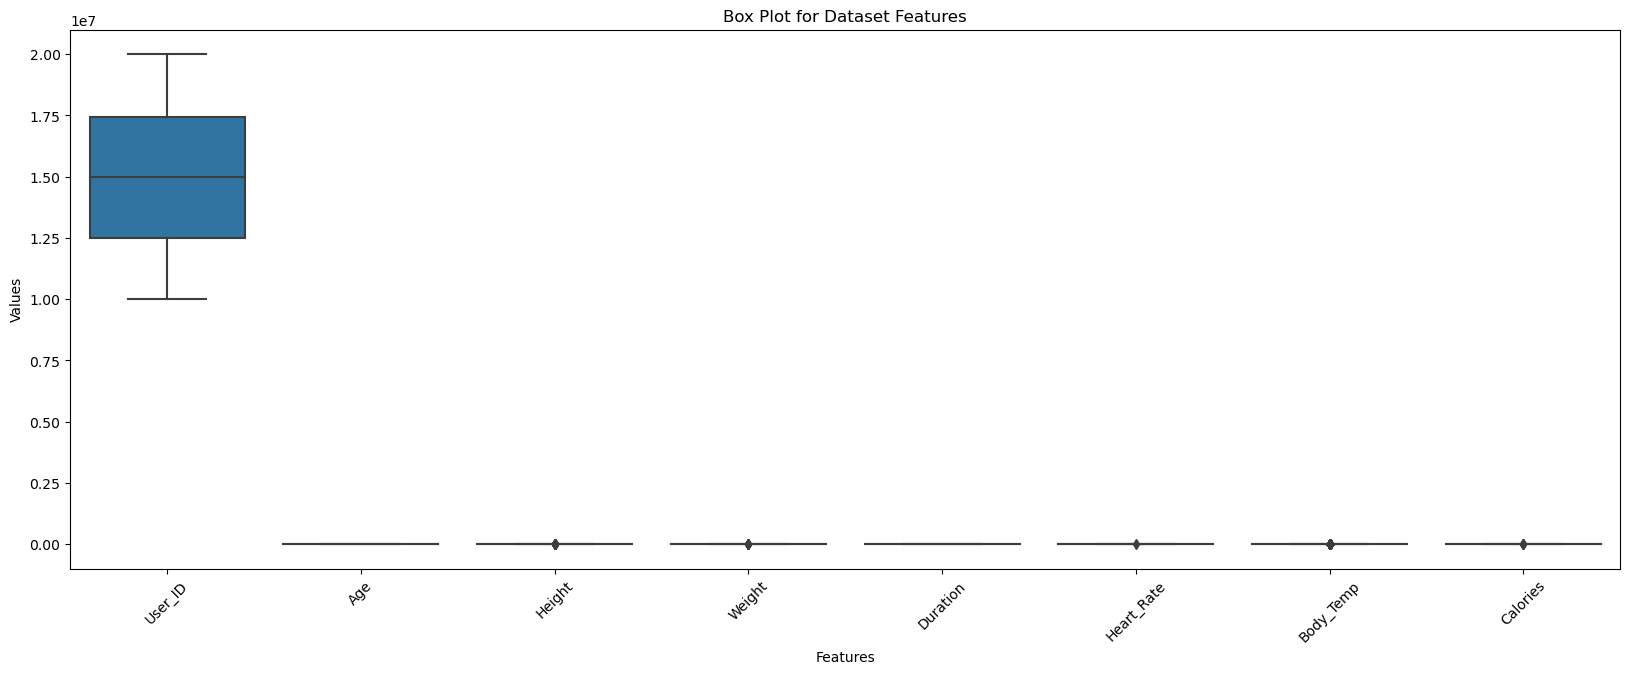

In [15]:
columns = df.select_dtypes(include='float').columns

plt.figure(figsize=(20, 7))
sns.boxplot(data=df)
plt.title('Box Plot for Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Converting the Gender value of male and female to a numerical value where male = 0 and female = 1

In [16]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Feature Selection

In [17]:
X=df.drop(['User_ID','Calories'],axis=1)
Y=df['Calories']

# Splitting data to training and testing

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Feature Scaling 

In [20]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [21]:
x_train_transformed=SC.fit_transform(X_train)     
x_train_transformed

array([[ 0.9905447 , -0.2743878 , -0.38005173, ..., -1.50716844,
        -1.09434547, -1.95934786],
       [-1.00954556, -0.74637671,  1.37260409, ..., -0.7865859 ,
        -0.47050539, -0.54883026],
       [ 0.9905447 ,  2.08555674,  0.5313293 , ..., -1.02678008,
        -1.19831881, -0.80528801],
       ...,
       [ 0.9905447 , -1.04136978, -0.5202642 , ...,  0.53448209,
         0.46525473,  0.47700072],
       [ 0.9905447 , -0.39238503, -0.5202642 , ...,  1.49525881,
         1.29704151,  0.98991621],
       [-1.00954556, -0.74637671,  0.88186046, ..., -0.66648881,
        -0.15858535,  0.22054298]])

In [22]:
x_test_transformed=SC.transform(X_test)           
x_test_transformed

array([[ 0.9905447 , -0.09739196, -0.16973303, ...,  1.01487045,
         0.25730804,  0.98991621],
       [-1.00954556,  1.61356783,  1.02207293, ...,  1.01487045,
         1.81690824,  1.11814509],
       [ 0.9905447 ,  0.6105914 , -0.0996268 , ..., -1.02678008,
         0.04936135, -0.93351688],
       ...,
       [ 0.9905447 ,  0.84658585, -1.01100783, ...,  0.89477336,
         0.77717477,  0.22054298],
       [ 0.9905447 ,  0.90558447, -0.23983927, ..., -1.14687717,
        -1.40626551, -0.80528801],
       [ 0.9905447 ,  1.14157892,  0.04058567, ...,  0.17419082,
        -0.15858535,  0.34877185]])

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

# Training

In [25]:
lr.fit(x_train_transformed, Y_train)  

LinearRegression()

# Prediction

In [26]:
y_pred= lr.predict(x_test_transformed)

In [27]:
y_pred

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

# Testing

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

r2 = r2_score(Y_test, y_pred)
print("R^2 Score:", r2)


MSE: 130.0870738618839
MAE: 8.385188053147175
R^2 Score: 0.9668790377181355


In [29]:
input_data = (69, 179.0, 79.0, 5.0, 88.0, 38.7)

print("The calories burnt for the individual in the dataset is predicted as ", y_pred)


The calories burnt for the individual in the dataset is predicted as  [137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


# XGBRegressor

In [30]:
from xgboost import XGBRegressor

In [31]:
XGB = XGBRegressor()

# Training

In [32]:
XGB.fit(x_train_transformed, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction

In [33]:
y_pred2= XGB.predict(x_test_transformed)

In [34]:
y_pred2

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

# Testing

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred2)
print("MSE:", mse)

mae = mean_absolute_error(Y_test, y_pred2)
print("MAE:", mae)

r2 = r2_score(Y_test, y_pred2)
print("R^2 Score:", r2)


MSE: 4.710710012461346
MAE: 1.4833678883314132
R^2 Score: 0.998800624504713


In [36]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
print("The calories burnt for the individual in the dataset is predicted as ", y_pred2[0])


The calories burnt for the individual in the dataset is predicted as  125.58828


# RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor


In [72]:
RFR = RandomForestRegressor()

# Training

In [73]:
RFR.fit(x_train_transformed, Y_train)

RandomForestRegressor()

# Prediction

In [74]:
y_pred3= RFR.predict(x_test_transformed)

In [75]:
y_pred3

array([127.76, 221.88,  37.07, ..., 146.57,  23.96,  89.02])

# Testing

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred3)
print("MSE:", mse)

mae = mean_absolute_error(Y_test, y_pred3)
print("MAE:", mae)

r2 = r2_score(Y_test, y_pred3)
print("R^2 Score:", r2)


MSE: 6.987255633333334
MAE: 1.676496666666667
R^2 Score: 0.9982210021071649


In [176]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
print("The calories burnt for the individual in the dataset is predicted as ", y_pred3[0])


The calories burnt for the individual in the dataset is predicted as  127.76


# Ridge Regularization

In [152]:
from sklearn.linear_model import Ridge

In [153]:
Ridge = Ridge()

In [154]:
Ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

# Training

In [155]:
Ridge.fit(x_train_transformed, Y_train)

Ridge()

# Prediction

In [156]:
y_pred4= Ridge.predict(x_test_transformed)

In [157]:
y_pred4

array([137.48208579, 182.1870962 ,  50.17294145, ..., 157.54412068,
        16.55925798, 100.2146924 ])

# Testing

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred4)
print("MSE:", mse)

mae = mean_absolute_error(Y_test, y_pred4)
print("MAE:", mae)

r2 = r2_score(Y_test, y_pred4)
print("R^2 Score:", r2)


MSE: 130.08605717302513
MAE: 8.384821966003724
R^2 Score: 0.9668792965733188


In [174]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
print("The calories burnt for the individual in the dataset is predicted as ", y_pred4[0])


The calories burnt for the individual in the dataset is predicted as  137.48208578879687


# Lasso Regularization

In [159]:
from sklearn.linear_model import Lasso

In [160]:
Lasso = Lasso()

# Training

In [161]:
Lasso.fit(x_train_transformed, Y_train)

Lasso()

# Prediction

In [162]:
y_pred5= Lasso.predict(x_test_transformed)

In [163]:
y_pred5

array([136.78434121, 179.25600927,  51.09352763, ..., 150.1414618 ,
        20.61809143, 102.27668255])

# Testing

In [164]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, y_pred5)
print("MSE:", mse)

mae = mean_absolute_error(Y_test, y_pred5)
print("MAE:", mae)

r2 = r2_score(Y_test, y_pred5)
print("R^2 Score:", r2)


MSE: 153.65619507878932
MAE: 8.989469141792508
R^2 Score: 0.9608781957307861


In [175]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
print("The calories burnt for the individual in the dataset is predicted as ", y_pred5[0])


The calories burnt for the individual in the dataset is predicted as  136.784341208071
